In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('https://www.dataquest.io/wp-content/uploads/2020/11/ViewingActivity-sample.csv')

In [7]:
df.shape

(200, 10)

In [8]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [9]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)   #dropping all attributes columns that are not needed within the database 

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [10]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [11]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [12]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Central')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head(1)

,Start Time,Duration,Title
0,2013-03-20 00:17:53-05:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...


In [13]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Central]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [14]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [15]:
office.shape

(137, 3)

In [16]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(130, 3)

In [18]:
office['Duration'].sum()  #checks to see how many minutes of The office once has watched 

Timedelta('1 days 14:57:28')

In [19]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

# check to make sure the columns were added correctly
office.head(1)

,Start Time,Duration,Title,weekday,hour
10,2013-03-18 18:04:22-05:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,18


In [20]:
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

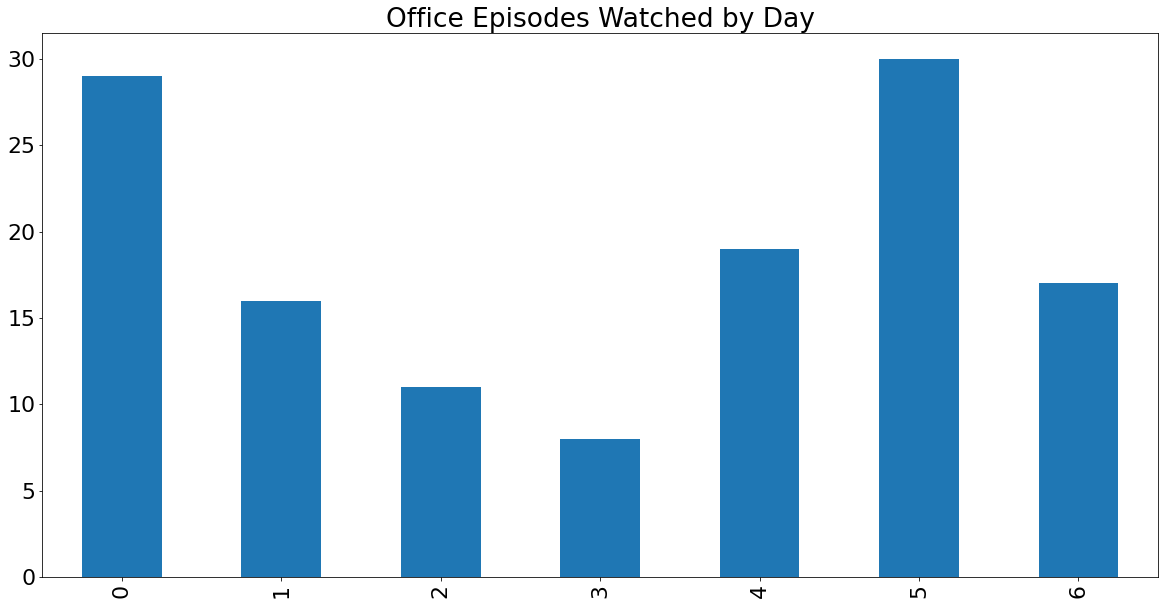

In [21]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

#this is a markdown